In [1]:
import cPickle as pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

In [2]:
def open_prepper(file_path):
    """Open the DataPrepper from pickled file."""
    with open(file_path) as f:
        prepper = pickle.load(f)
    return prepper

In [3]:
def custom_hist(array, lower, upper, nbins):
    """Get histogram of values.

    PARAMETERS
    ----------
    channel_array : 1D or 2D numpy array
        Raw data values.

    lower : int
        Lower limit of data values allowed.

    upper : int
        Upper limit of data values allowed.

    nbins : int
        Number of bins to put data into.

    RETURNS
    -------
    counts : list
        A list of the counts of values in each bin.
    """
    values = array.astype(int).flatten()
    data = np.round(values, decimals=0).astype(float)
    bin_width = ((upper+1) - lower)/float(nbins)
    steps = np.arange(lower, upper+1+bin_width, bin_width)[0:nbins+1]
    hist, edges = np.histogram(data, bins=steps)
    return list(hist)

In [4]:
file_path = '../data/store/data_prepper_ALL-CATEGORIES.pkl'
prepper = open_prepper(file_path)

In [5]:
X_train, y_train = prepper.return_training_data()

In [6]:
X_test, y_test = prepper.return_testing_data()

In [7]:
X_train.shape

(132286, 1089)

In [8]:
X_test.shape

(33072, 1089)

In [9]:
X_combined = pd.concat((X_train, X_test), axis=0)

In [10]:
y_combined = pd.concat((y_train, y_test), axis=0)

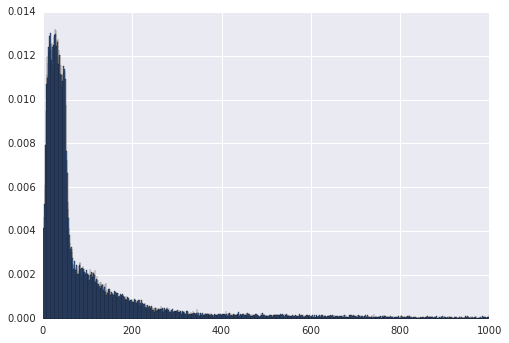

In [60]:
views = y_train['image_views']
views_hist,bins,_ = plt.hist(views, bins=1000, range=(0, 1000), normed=True)

In [61]:
views_hist.shape

(1000,)

In [62]:
bins.shape

(1001,)

In [63]:
i = 21
j = 40

In [64]:
cmap = ['skyblue','tomato','mediumseagreen','lightslategrey', 'y']

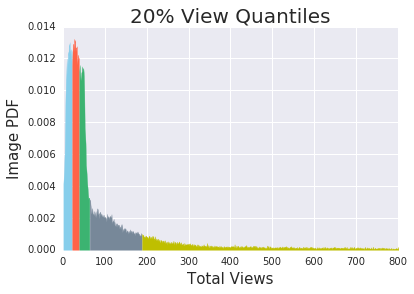

In [90]:
plt.figure(figsize=(6, 4))
for i, j, color in zip(limits[:-1], limits[1:], cmap):
    div = (bins[:-1]<=j) & (bins[:-1]>i)
    plt.fill_between(bins[:-1][div], 0, views_hist[div], color=color)
plt.title('20% View Quantiles', fontsize=20)
plt.ylabel("Image PDF", fontsize=15)
plt.xlabel("Total Views", fontsize=15)
# plt.tick_params(
#     axis='y',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     left='off',      # ticks along the bottom edge are off
#     right='off',         # ticks along the top edge are off
#     labelleft='off') # labels along the bottom edge are off
plt.xlim((0, 800))
plt.savefig('visuals/20PercentHist.jpg', dpi=300)

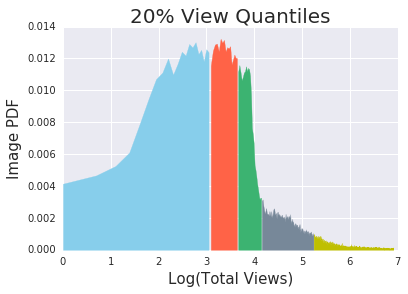

In [91]:
plt.figure(figsize=(6, 4))
for i, j, color in zip(limits[:-1], limits[1:], cmap):
    div = (bins[:-1]<=j) & (bins[:-1]>i)
    plt.fill_between(np.log(bins)[:-1][div], 0, views_hist[div], color=color)
plt.title('20% View Quantiles', fontsize=20)
plt.ylabel("Image PDF", fontsize=15)
plt.xlabel("Log(Total Views)", fontsize=15)
# plt.tick_params(
#     axis='y',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     left='off',      # ticks along the bottom edge are off
#     right='off',         # ticks along the top edge are off
#     labelleft='off') # labels along the bottom edge are off
# plt.xlim((0, 800))
plt.savefig('visuals/Log20PercentHist.jpg', dpi=300)

In [17]:
limits = []
n=5
quantiles = np.arange(0, n+1)/float(n)
for i, quant in enumerate(quantiles):
    limits.append(views.quantile(quant))
limits
# log_limits = np.log(limits)

[0.0, 21.0, 38.0, 63.0, 188.0, 83589.0]

In [14]:
limits

array([  0.00000000e+00,   2.10000000e+01,   3.80000000e+01,
         6.30000000e+01,   1.88000000e+02,   8.35890000e+04])

In [ ]:
log_views = np.log(views)
hist_views = np.hist

In [ ]:
for i, lim in enumerate(limits[:-1]):
    plt.hist(log_views[(views>limits[i]) & (views<=limits[i+1])], bins=(np.round(limits[i+1]-limits[i])))
plt.show()

In [ ]:
model = open_prepper('../data/store/GBC_model_image_views_quantized_BUILDING.pkl')

In [ ]:
model.predict_proba(X_combined.loc['27672924@N03'].loc[3311374123].reshape((1, -1))).reshape((-1,))

In [ ]:
plt.figure(figsize=(12, 7))
plt.title("Distribution of Image Total Views", fontsize=20)
plt.xlabel("Image Views", fontsize=15)
plt.ylabel("Users", fontsize=15)


plt.hist(y_train['user_total_views'], bins=1000, histtype='step', lw=5)
plt.show()

In [ ]:
ownwer_views = np.array(list(y_train[['user_total_views']].groupby(level=0).mean().values))

In [ ]:
counts = custom_hist(ownwer_views, 0, 1000, 1000)

In [ ]:
plt.plot(counts)

In [ ]:
views = np.array(list(y_train['image_views'][y_train['image_views']<=300]))

In [ ]:
counts = custom_hist(views, 0, 300, 300)

In [ ]:
plt.plot(counts)

In [ ]:
data = []
for i, count in enumerate(counts):
    data.append([i, count])

In [ ]:
X_train.values.tolist()[0]

In [ ]:
plt.hist(y_train['image_views_quantized'])

In [ ]:
prepper.column_limits

In [ ]:
dir_for_app_plots = '../app/static/analytics/img/'
plt.figure(figsize=(12, 7))
plt.title("Distribution of Image Views", fontsize=30)
plt.xlabel("Image Views", fontsize=20)
# seaborn.set_style(style='darkgrid')
seaborn.kdeplot(y_train['image_views'], gridsize=50000)
plt.xlim(0, 300)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig(dir_for_app_plots+'image_views_hist.png')

In [94]:
pro = y_train['user_is_pro'].value_counts()[1]

In [96]:
pro/float(len(y_train))

0.57625901455936379

In [ ]:
from IPython.display import Image
Image(filename='../../Photo_Pro/data/store/GBC_model_user_is_pro_ANIMALS_plot.png') 